In [15]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#importing data
path = "data/shot_logs.csv"
file = pd.read_csv(path)
file.head(2)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148


In [4]:
#getting info on dataset
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [5]:
#selecting the columns we want and putting them into a new data frame
data = file[['SHOT_RESULT','SHOT_DIST','SHOT_CLOCK']]

#data cleaning
data = data.rename(columns={
    'SHOT_RESULT':'result',
    'SHOT_DIST':'distance',
    'SHOT_CLOCK':'shotclock'
})
data_cleaned = data.dropna()
data_cleaned

,result,distance,shotclock
0,made,7.7,10.8
1,missed,28.2,3.4
3,missed,17.2,10.3
4,missed,3.7,10.9
5,missed,18.4,9.1
...,...,...,...
128063,made,8.9,15.3
128064,missed,8.7,18.3
128065,made,0.6,19.8
128066,made,16.9,23.0


In [6]:
#DISTANCE min and max
maxdist=data_cleaned.max()['distance']
mindist=data_cleaned.min()['distance']

print(f"the maximum shot distance was {maxdist}")
print(f"the minimum shot distance was {mindist}")

the maximum shot distance was 43.5
the minimum shot distance was 0.0


In [7]:
#SHOTCLOCK min and max
clockmax=data_cleaned.max()['shotclock']
clockmin=data_cleaned.min()['shotclock']

print(f"the maximum shot clock time was {clockmax}")
print(f"the minimum shot clock time was {clockmin}")

the maximum shot clock time was 24.0
the minimum shot clock time was 0.0


In [8]:
#DISTANCE BINS
dist_bins = [0, 4.9, 9.9, 14.9, 19.9, 24.9, 29.9, 34.9]
dist_groupnames = ["<5", "5-9.9", "10-14.9", "15-19.9", "20-24.9", "25-29.9", ">30"]

#SHOTCLOCK BINS
clock_bins = [0, 3.9, 7.9, 11.9, 15.9, 19.9, 25]
clock_groupnames = ["<4", "4-7.9", "8-11.9", "12-15.9", "16-19.9", ">20"]

In [19]:
#cutting the data into bins and adding columns for bins
data_cleaned['dist_bins'] = pd.cut(data_cleaned['distance'], dist_bins, labels = dist_groupnames, include_lowest = True)
data_cleaned['clock_bins'] = pd.cut(data_cleaned['shotclock'], clock_bins, labels = clock_groupnames, include_lowest = True)
data_cleaned

C:\Users\navee\AppData\Local\Temp\ipykernel_27200\204719670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['dist_bins'] = pd.cut(data_cleaned['distance'], dist_bins, labels = dist_groupnames, include_lowest = True)
C:\Users\navee\AppData\Local\Temp\ipykernel_27200\204719670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['clock_bins'] = pd.cut(data_cleaned['shotclock'], clock_bins, labels = clock_groupnames, include_lowest = True)


,result,distance,shotclock,dist_bins,clock_bins
0,made,7.7,10.8,5-9.9,8-11.9
1,missed,28.2,3.4,25-29.9,<4
3,missed,17.2,10.3,15-19.9,8-11.9
4,missed,3.7,10.9,<5,8-11.9
5,missed,18.4,9.1,15-19.9,8-11.9
...,...,...,...,...,...
128063,made,8.9,15.3,5-9.9,12-15.9
128064,missed,8.7,18.3,5-9.9,16-19.9
128065,made,0.6,19.8,<5,16-19.9
128066,made,16.9,23.0,15-19.9,>20


Text(0, 0.5, '# made shots')

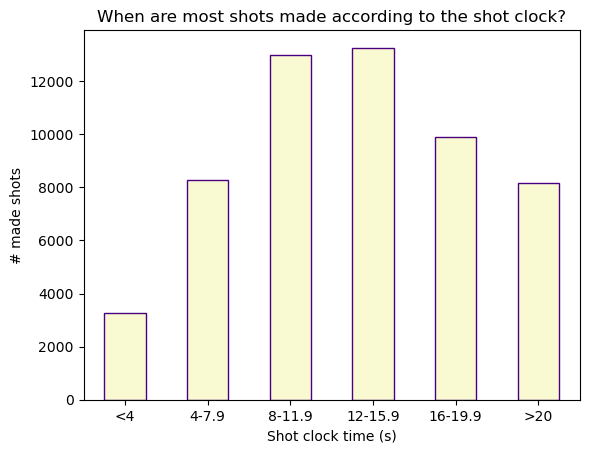

In [20]:
#most shots are made at what shot clock value?
made_only = data_cleaned.loc[data_cleaned['result']=='made']
df1 = made_only['clock_bins'].value_counts()

df1.loc[clock_groupnames].plot(kind = "bar", legend = False, color = "lightgoldenrodyellow", edgecolor = 'indigo')
plt.xticks(rotation = "horizontal")
plt.title("When are most shots made according to the shot clock?")
plt.xlabel("Shot clock time (s)")
plt.ylabel("# made shots")

In [21]:
#chi square test on shot clock bins
data1 = {'clock_bins': [13257, 13000, 9911, 8289, 8154, 3269]}
chisq1 = pd.DataFrame(data1, index=['12-15.9', '8-11.9', '16-19.9', '4-7.9', '>20', '<4'])
chisq1['expected'] = 9313.33333333
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
stats.chisquare(chisq1['clock_bins'], chisq1['expected'])

Power_divergenceResult(statistic=7347.369506087098, pvalue=0.0)

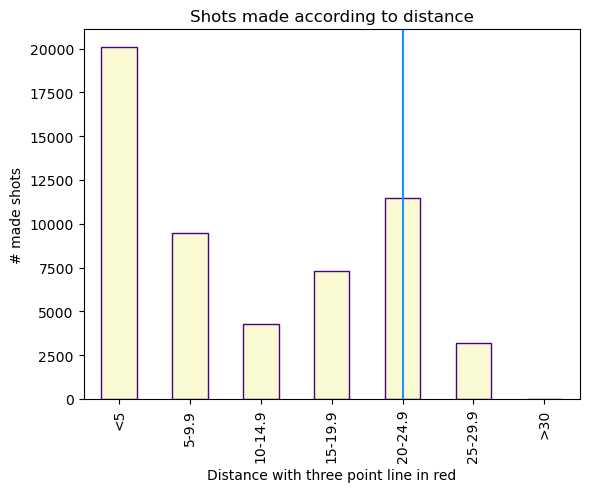

In [22]:
df2 = made_only['dist_bins'].value_counts()

df2.loc[dist_groupnames].plot(kind = "bar", legend = False, color = 'lightgoldenrodyellow', edgecolor = 'indigo')
plt.xticks(rotation = "vertical")
plt.title("Shots made according to distance")
plt.xlabel("Distance with three point line in red")
plt.ylabel("# made shots")
plt.axvline(x=4, color = "dodgerblue")

([<matplotlib.patches.Wedge at 0x1212cc76830>,
 [Text(-0.8160698648472713, -0.7375838770527434, 'Made'),
  Text(0.8160699339048544, 0.7375838006467651, 'Missed')],
 [Text(-0.44512901718942066, -0.4023184783924055, '45.6%'),
  Text(0.44512905485719323, 0.40231843671641726, '54.4%')])

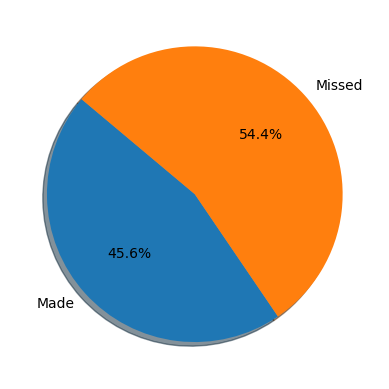

In [30]:
#Pie chart of all shot results
made_counter1 = 0
missed_counter1 = 0

for result in data_cleaned['result']:
    if result == "made":
        made_counter1 += 1
    else:
        missed_counter1 += 1
        
pielist1 = [made_counter1, missed_counter1]
labels = ["Made", "Missed"]

plt.pie(pielist1, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)
#subplots get them on the same plot and add titles

([<matplotlib.patches.Wedge at 0x1212d1897b0>,
 [Text(-0.3499939198826483, -1.0428347213461866, 'Made'),
  Text(0.3499939198826484, 1.0428347213461866, 'Missed')],
 [Text(-0.1909057744814445, -0.5688189389161017, '61.9%'),
  Text(0.19090577448144455, 0.5688189389161017, '38.1%')])

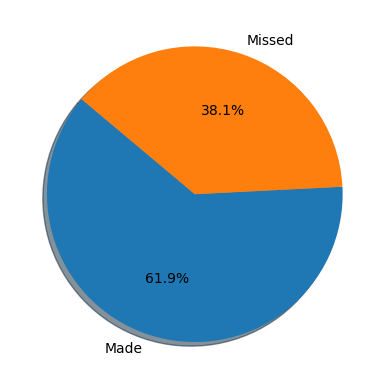

In [31]:
close_shots = data_cleaned.loc[data_cleaned['distance']<5]

made_counter2 = 0
missed_counter2 = 0

for result in close_shots['result']:
    if result == "made":
        made_counter2 += 1
    else:
        missed_counter2 += 1
        
pielist2 = [made_counter2, missed_counter2]
labels = ["Made", "Missed"]

plt.pie(pielist2, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1212d1ec3d0>,
 [Text(-1.0996581003842978, 0.027423753557779273, 'Made'),
  Text(1.099658099100498, -0.02742380503649026, 'Missed')],
 [Text(-0.599813509300526, 0.014958411031515965, '21.4%'),
  Text(0.5998135086002716, -0.014958439110812866, '78.6%')])

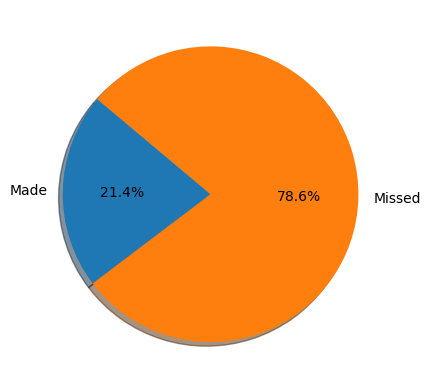

In [32]:
far_shots = data_cleaned.loc[data_cleaned['distance']>35]

made_counter3 = 0
missed_counter3 = 0

for result in far_shots['result']:
    if result == "made":
        made_counter3 += 1
    else:
        missed_counter3 += 1
        
pielist3 = [made_counter3, missed_counter3]
labels = ["Made", "Missed"]

plt.pie(pielist3, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)

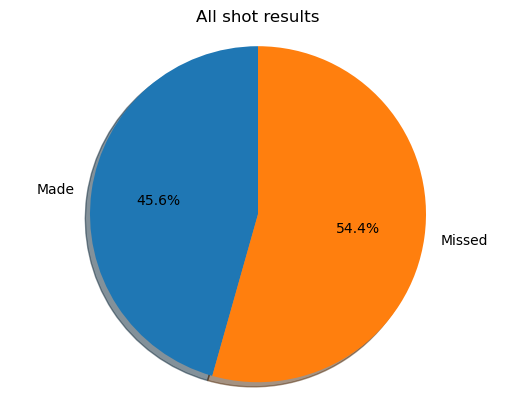

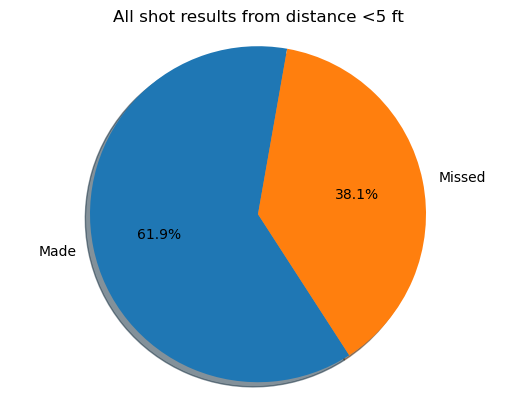

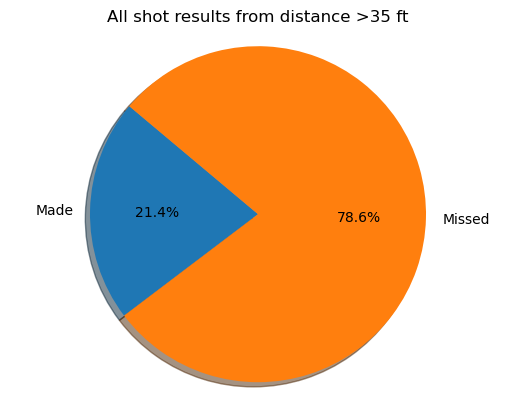

In [45]:
#Getting all the pie charts into a single figure

#making the first pie chart
fig1, ax1 = plt.subplots()
ax1.pie(pielist1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("All shot results")

#making the second pie chart
fig2, ax2 = plt.subplots()
ax2.pie(pielist2, labels=labels, autopct='%1.1f%%', shadow=True, startangle=80)
ax2.axis('equal')
ax2.set_title("All shot results from distance <5 ft")

#making the third pie chart
fig3, ax3 = plt.subplots()
ax3.pie(pielist3, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
ax3.axis('equal')
ax3.set_title("All shot results from distance >35 ft")

#combining plots and showing
plt.subplots_adjust(wspace=0.5)
plt.show()